# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from path import Path
from newsapi import NewsApiClient
import spacy
from spacy import displacy

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# Load environment variables and retrieve the News API key
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

8470

In [6]:
# Fetch the Bitcoin news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

2925

In [7]:
# Create the Bitcoin sentiment scores DataFrame
 
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
3,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
 
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.195090,0.048400,0.003150,0.94845
std,0.288628,0.064743,0.014087,0.06379
min,-0.273200,0.000000,0.000000,0.80100
25%,0.000000,0.000000,0.000000,0.89650
50%,0.000000,0.000000,0.000000,1.00000
75%,0.481000,0.103500,0.000000,1.00000
max,0.755800,0.199000,0.063000,1.00000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.244525,0.051750,0.002400,0.94585
std,0.293290,0.065363,0.010733,0.06974
min,0.000000,0.000000,0.000000,0.79200
25%,0.000000,0.000000,0.000000,0.90525
50%,0.000000,0.000000,0.000000,1.00000
75%,0.475775,0.094750,0.000000,1.00000
max,0.822500,0.208000,0.048000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean score at 0.051750. Bitcoin was only at 0.048400 mean positive score. 

Q: Which coin had the highest compound score?

A: Ethereum had the higher mean compound score at 0.244525. Bitcoin was only at 0.195090 mean compound score. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# Instantiate the list of stopwords, then convert all to lowercase
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

# print statement only for testing purposes 
#print(sw)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    str_words = ' '.join(str(e) for e in words)
    # Create custom stopwords
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'chars', '\r\n'}

    # Create a tokenized list of the words
    doc = nlp(str_words)
    doc_words = ' '.join(str(e) for e in doc)
    tok = word_tokenize(doc_words)
    result = [word.lower() for word in tok]
    lemma_words = ' '.join(str(e) for e in result)
    # Lemmatize words into root words
    lemma_result = lemmatizer.lemmatize(lemma_words)
   
    # Convert the words to lowercase
    lower_result = [lemma_result.lower() for word in lemma_result]
    re_words = ' '.join(str(e) for e in lower_result)
    # Remove the stop words
    re_words = word_tokenize(re_words)
    tokens = [word.lower() for word in re_words if word.lower() not in sw.union(sw_addons)]
    
    
    return tokens

In [14]:
#text1 = bitcoin_df["text"][0]

#results = tokenizer(text1)
#print(results)

In [15]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
2,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[big, new, presence, slurping, power, grid, gr..."
3,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [16]:
# Create a new tokens column for Bitcoin
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, bridge, currently, connected, ethereum, ..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, musk, picture, alliance, getty, images,..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
word_counts = Counter(bitcoin_df["tokens"][0])
print(dict(word_counts))

{'similar': 188, 'hoax': 188, 'earlier': 188, 'year': 188, 'tied': 188, 'walmart': 188, 'litecoin': 188, 'buy': 188, 'something': 188, 'verge': 188, 'link': 188, 'vox': 188, 'media': 188, 'may': 188, 'earn': 188, 'commission': 188, 'see': 188, 'ethics': 188, 'statement': 188, 'photo': 188, 'illustration': 188, 'thiago': 188}


In [19]:
# Generate the Bitcoin N-grams where N=2
#str.cat() method takes all values and concatenate them into a single string 
btc_grams = ngrams(tokenizer(bitcoin_df["text"].str.cat()), n=2)
Counter(btc_grams).most_common(20)

[(('reuters', 'bitcoin'), 17110),
 (('cryptocurrency', 'bitcoin'), 13688),
 (('illustration', 'taken'), 13688),
 (('oct', 'reuters'), 13688),
 (('bitcoin', 'seen'), 13688),
 (('representation', 'virtual'), 10266),
 (('virtual', 'cryptocurrency'), 10266),
 (('seen', 'picture'), 10266),
 (('picture', 'illustration'), 10266),
 (('taken', 'october'), 10266),
 (('bitcoin', 'hit'), 10266),
 (('kong', 'oct'), 6844),
 (('posted', 'bitcoin'), 6844),
 (('record', 'high'), 6844),
 (('hit', 'high'), 6844),
 (('via', 'getty'), 6844),
 (('getty', 'images'), 6844),
 (('trading', 'higher'), 6844),
 (('similar', 'hoax'), 3422),
 (('hoax', 'earlier'), 3422)]

In [20]:
# Generate the Ethereum N-grams where N=2
#str.cat() method takes all values and concatenate them into a single string 
eth_grams = ngrams(tokenizer(ethereum_df["text"].str.cat()), n=2)
Counter(eth_grams).most_common(20)

[(('bitcoin', 'ethereum'), 14120),
 (('getty', 'images'), 10590),
 (('new', 'york'), 10590),
 (('representations', 'cryptocurrencies'), 10590),
 (('ethereum', 'dogecoin'), 10590),
 (('illustration', 'taken'), 10590),
 (('taken', 'june'), 10590),
 (('rahul', 'rai'), 10590),
 (('elon', 'musk'), 7060),
 (('cryptocurrency', 'exchange'), 7060),
 (('cryptocurrencies', 'bitcoin'), 7060),
 (('dogecoin', 'ripple'), 7060),
 (('ripple', 'litecoin'), 7060),
 (('litecoin', 'placed'), 7060),
 (('placed', 'pc'), 7060),
 (('pc', 'motherboard'), 7060),
 (('motherboard', 'illustration'), 7060),
 (('june', 'photo'), 7060),
 (('new', 'bridge'), 3530),
 (('bridge', 'currently'), 3530)]

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
btc_all = tokenizer(bitcoin_df["text"].str.cat())
result_top10_btc = token_count(btc_all, 10)
print(result_top10_btc)

[('bitcoin', 82128), ('reuters', 20532), ('illustration', 17110), ('new', 17110), ('taken', 17110), ('record', 17110), ('ether', 17110), ('representation', 13688), ('cryptocurrency', 13688), ('oct', 13688)]


In [23]:
# Use token_count to get the top 10 words for Ethereum
 
eth_all = tokenizer(ethereum_df["text"].str.cat())

result_top10_eth = token_count(eth_all, 10)
print(result_top10_eth)

[('ethereum', 42360), ('bitcoin', 35300), ('cryptocurrency', 31770), ('new', 17650), ('images', 17650), ('cryptocurrencies', 14120), ('ether', 14120), ('bridge', 10590), ('getty', 10590), ('york', 10590)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

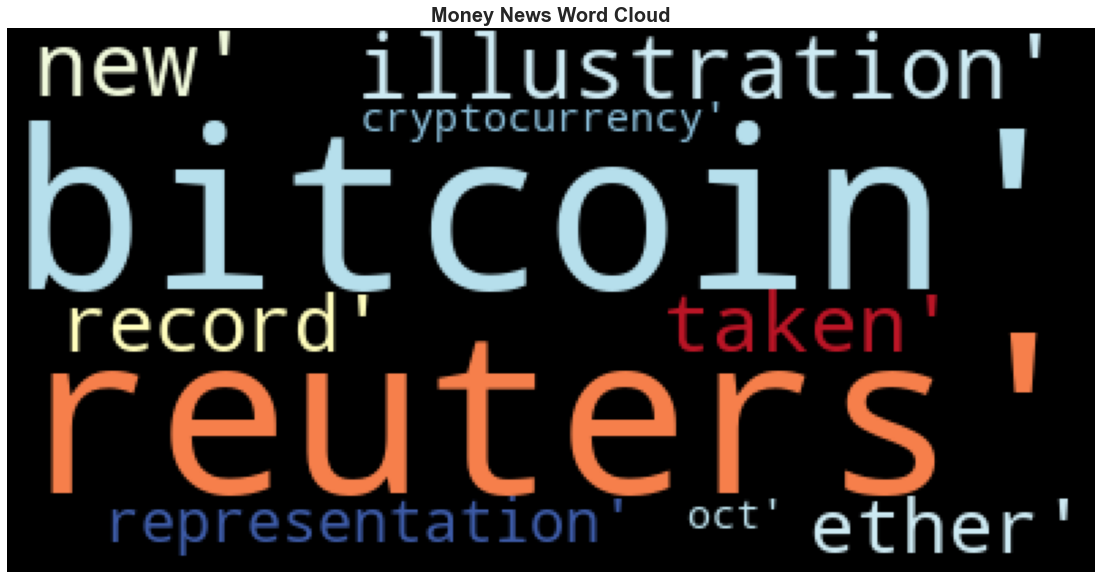

In [25]:
# Generate the Bitcoin word cloud
# Create a string list of terms to generate the word cloud
terms_list = str(result_top10_btc)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()

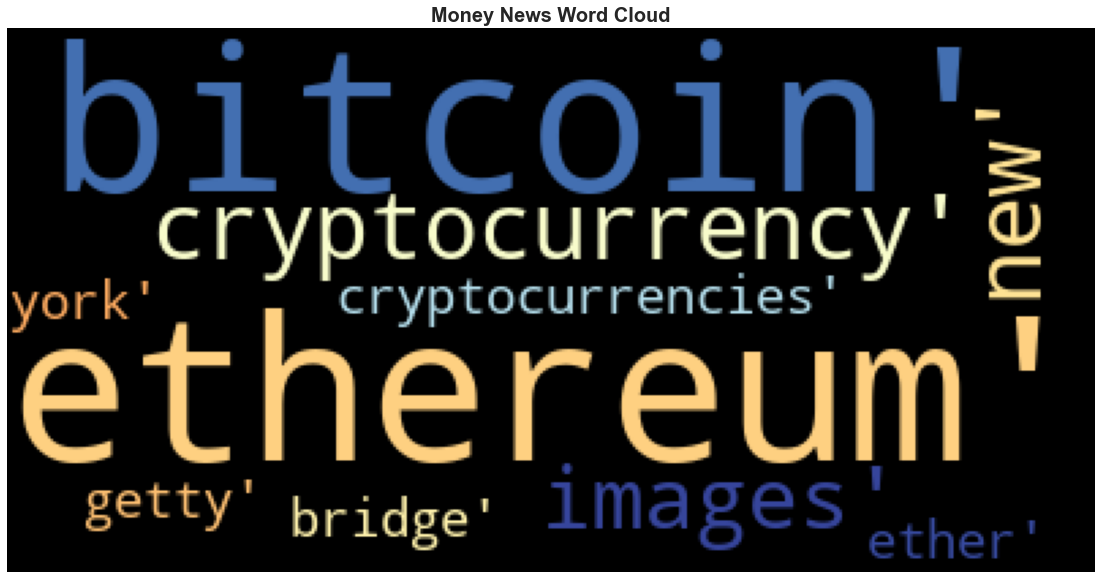

In [26]:
# Generate the Ethereum word cloud
terms_list = str(result_top10_eth)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
#all of the Bitcoin text together
all_btc_text = bitcoin_df["text"].str.cat()


In [31]:
# Run the NER processor on all of the text
# Set article to be analyzed with spaCy
doc = nlp(all_btc_text)
 
doc.user_data["title"] = "Title: Bitcoin NER"
 

# Render NER visualization with displacy
displacy.render(doc, style='ent')

# Add a title to the document
# YOUR CODE HERE!

In [32]:
# List all Entities
for ent in doc.ents:
    print(ent.text + ':   ' + ent.label_)

earlier this year:   DATE
Walmart to Litecoin
:   ORG
Verge:   ORG
Vox Media:   ORG
Photo Illustration:   PERSON
Thiago Prudencio/S:   ORG
$1.6 billion:   MONEY
Wednesday:   DATE
a couple of minutes:   TIME
U.S.:   GPE
U.S.:   GPE
China:   GPE
Bloomberg:   GPE
the National Bureau:   ORG
Bitcoin:   PERSON
June 29, 2021:   DATE
Dado Ruvic/IllustrationHONG KONG:   PERSON
Reuters:   ORG
Bitcoin:   PERSON
October 19, 2021:   DATE
Edgar SuLONDON:   PERSON
Reuters:   ORG
Bitcoin:   PERSON
October 19, 2021:   DATE
Reuters:   ORG
Bitcoin:   PERSON
Wednesday:   DATE
first:   ORDINAL
U.S.:   GPE
Conway G. Gittens:   PERSON
Bitcoin:   PERSON
October 18, 2021:   DATE
Edgar SuSINGAPORE:   PERSON
Reuters:   ORG
six-month:   DATE
Reuters:   ORG
SINGAPORE:   PERSON
Reuters:   ORG
six-month:   DATE
Tuesday:   DATE
U.S.:   GPE
NurPhoto:   ORG
Getty Images:   ORG
first:   ORDINAL
Tuesday:   DATE
ProShares:   ORG
Marco Bello:   PERSON
Getty Images:   ORG
The Securities and Exchange Commission:   ORG
Valkyr

---

### Ethereum NER

In [33]:
#all of the Ethereum text together
all_eth_text = ethereum_df["text"].str.cat()


#commented out for testing purposes 
#all_eth_text

In [34]:
# Run the NER processor on all of the text
# Set article to be analyzed with spaCy
doc_eth = nlp(all_eth_text)

# Add a title to the document
doc_eth.user_data["title"] = "Title: Ethereum NER"
 
# Render the visualization
# Render NER visualization with displacy
displacy.render(doc_eth, style='ent')




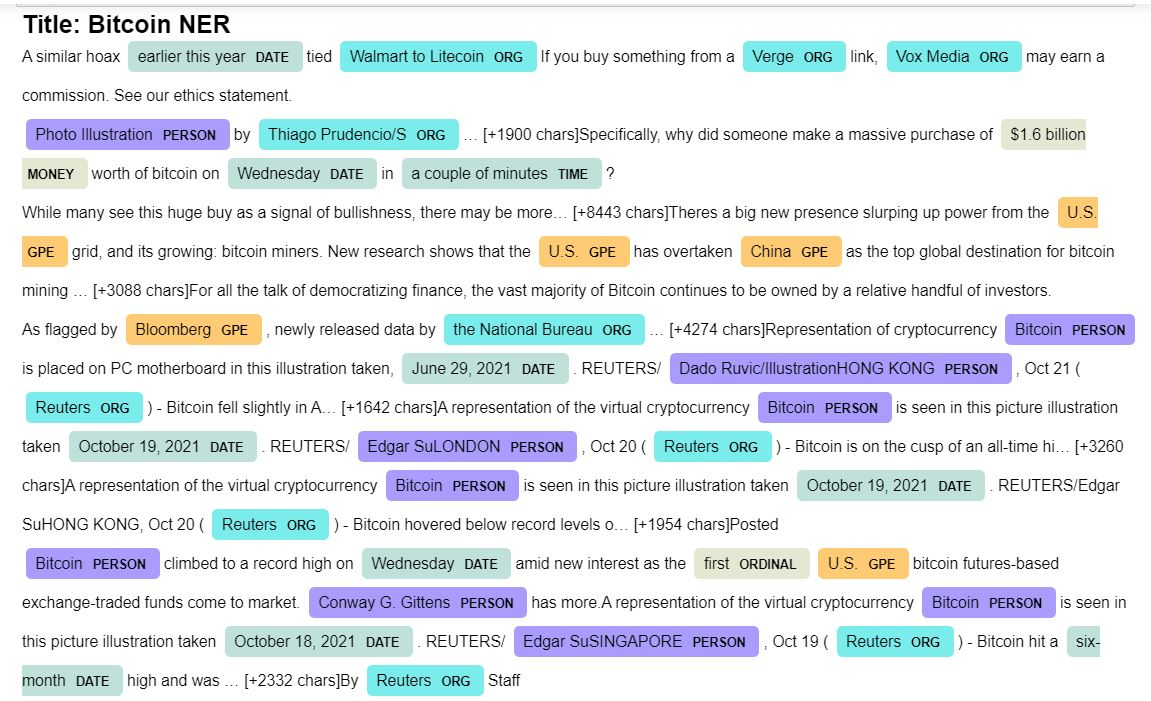

In [36]:
from IPython.display import Image
Image(filename='BTC_NER.JPG') 

In [35]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text + ':   ' + ent.label_)

Nervos :   PERSON
today:   DATE
the Force Bridge:   FAC
Cuban:   NORP
CNBC:   ORG
Wednesday:   DATE
Bitcoin:   PERSON
two:   CARDINAL
Jordan Mansfield:   PERSON
JPMorgan:   ORG
Getty Images:   ORG
Elon Musk:   PERSON
3,780%:   PERCENT
October:   DATE
Dogelon Mars:   PERSON
0.00000229:   MONEY
November 1:   DATE
$0.0…:   MONEY
Getty Images:   PERSON
the past week:   DATE
Tim Cook:   PERSON
The New York Times' Dealbook:   ORG
Tuesday:   DATE
Hong Kong:   GPE
September 30, 2021:   DATE
FTX:   ORG
NFT:   ORG
Robert Nickelsberg:   PERSON
Getty Images:   ORG
Coinbase Global:   PERSON
NFT:   ORG
the end of the year:   DATE
US:   GPE
Ethereum:   ORG
NurPhoto:   ORG
Getty Images:   ORG
first:   ORDINAL
Bitcoin, Ethereum:   ORG
Litecoin:   PERSON
June 29, 2021:   DATE
Burger King:   ORG
Robinhood:   ORG
Bitcoin , Ethereum and Dogecoin:   ORG
Royal Perks:   ORG
5:   MONEY
Rai:   PERSON
Market Neutral:   ORG
BlockTower Capital:   ORG
Rahul Rai:   PERSON
second:   ORDINAL
4,400:   MONEY
Friday:   D

---